### import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

### load data

In [4]:
# 2. Load data
df = pd.read_excel("rumah_tangga.xlsx")
df = df[df['Jenis Kelamin'] == 'Perempuan']

# 3. Label Encoding
le_daerah = LabelEncoder()
le_umur = LabelEncoder()
df['Daerah_enc'] = le_daerah.fit_transform(df['Daerah'])
df['Umur_enc'] = le_umur.fit_transform(df['Kelompok Umur'])

# 4. Drop kolom yang tidak perlu dan urutkan
df = df.sort_values(by='Tahun')
df_model = df.drop(columns=['No', 'Jenis Kelamin', 'Daerah', 'Kelompok Umur'])


In [5]:
# 5. Normalisasi
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_model)


### sequences untuk membentuk data time series

In [6]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

sequence_length = 3
X, y = create_sequences(scaled_data, sequence_length)


In [7]:
# 7. Split data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [8]:
# 8. Buat model Deep Learning: Conv1D + LSTM
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1]))
model.compile(optimizer='adam', loss='mse')


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# 9. Training model
es = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=16,
                    validation_data=(X_test, y_test),
                    callbacks=[es])


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 400ms/step - loss: 0.2898 - val_loss: 0.3077
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1995 - val_loss: 0.2061
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1364 - val_loss: 0.1321
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1098 - val_loss: 0.1129
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1174 - val_loss: 0.1142
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1055 - val_loss: 0.1161
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0994 - val_loss: 0.1132
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0934 - val_loss: 0.1078
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0975 - val_loss: 0.1048
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0949 - val_loss: 0.1033
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0897 - val_loss: 0.1007
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0889 - val_l

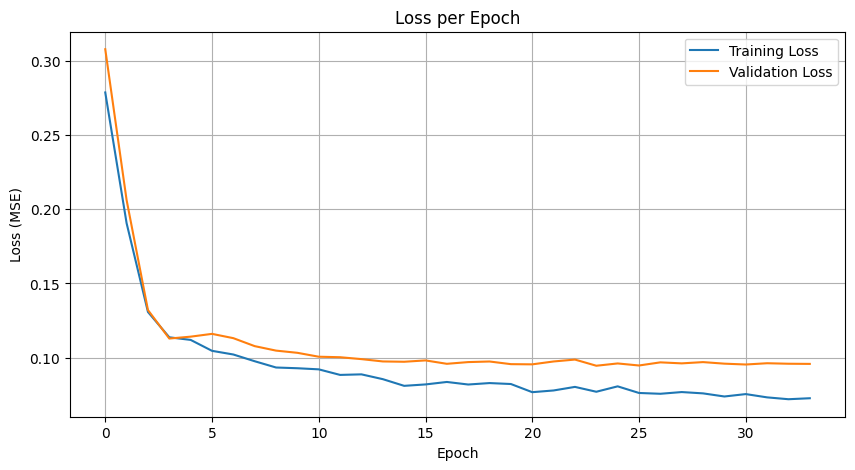

In [10]:
# 10. Visualisasi loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# 11. Simpan model
model.save("model_rumah_tangga_2025.h5")
print("Model berhasil disimpan sebagai model_rumah_tangga_2025.h5")

Model berhasil disimpan sebagai model_rumah_tangga_2025.h5


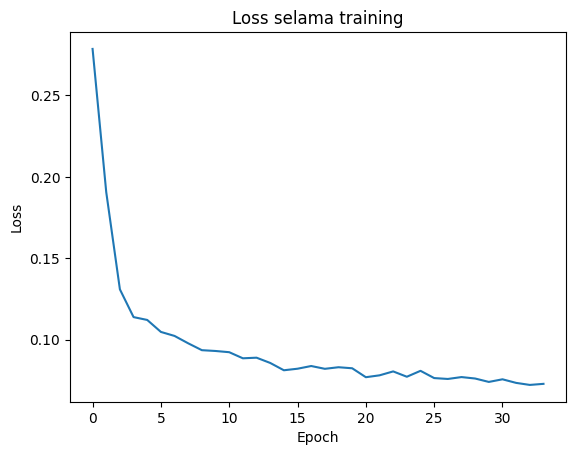

In [ ]:
# Visualisasi loss training dari model CNN-LSTM sebelumnya.
plt.plot(history.history['loss'])
plt.title('Loss selama training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:

# Evaluasi performa model CNN-LSTM dengan 3 metrik regresi utama
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluasi model
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluasi Model CNN-LSTM:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  
Evaluasi Model CNN-LSTM:
RMSE: 0.3076
MAE : 0.2472
R²  : -0.1543


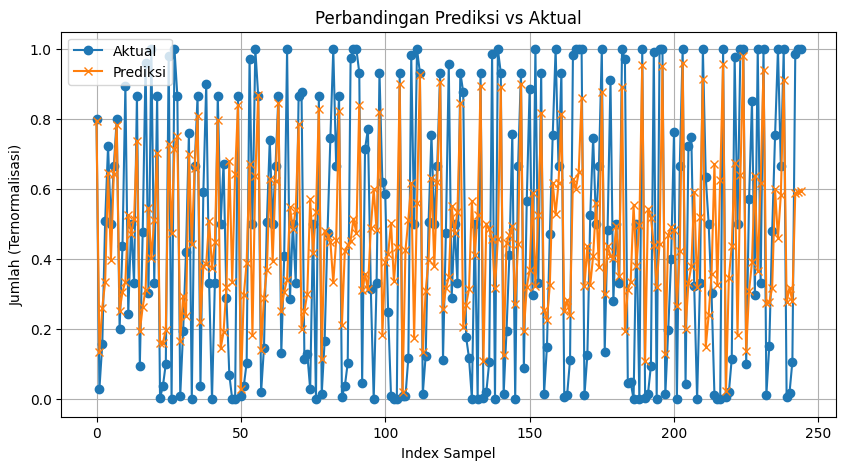

In [17]:

import matplotlib.pyplot as plt

# Plot aktual vs prediksi
plt.figure(figsize=(10, 5))
plt.plot(y_test.flatten(), label='Aktual', marker='o')
plt.plot(y_pred.flatten(), label='Prediksi', marker='x')
plt.title('Perbandingan Prediksi vs Aktual')
plt.xlabel('Index Sampel')
plt.ylabel('Jumlah (Ternormalisasi)')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Model 1 : CNN
from tensorflow.keras.layers import Flatten

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model_cnn.add(Flatten())
model_cnn.add(Dense(y.shape[1]))
model_cnn.compile(optimizer='adam', loss='mse')
history_cnn = model_cnn.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), verbose=0)

In [19]:
# Model 2 :LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(100, return_sequences=False, input_shape=(X.shape[1], X.shape[2])))
model_lstm.add(Dense(y.shape[1]))
model_lstm.compile(optimizer='adam', loss='mse')
history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), verbose=0)

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Model 3 : CNN-LSTM
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model_cnn_lstm.add(LSTM(100, return_sequences=False))
model_cnn_lstm.add(Dense(y.shape[1]))
model_cnn_lstm.compile(optimizer='adam', loss='mse')
history_cnn_lstm = model_cnn_lstm.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), verbose=0)

In [36]:
# Simpan model CNN-LSTM
model_cnn_lstm.save("model_cnn_lstm.h5")
print("Model CNN-LSTM berhasil disimpan")

# Simpan scaler
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
print("Scaler berhasil disimpan")


Model CNN-LSTM berhasil disimpan
Scaler berhasil disimpan


In [22]:
# evaluasi setiap model
def evaluate_model(model, name):
    predicted = model.predict(X)

    rmse = np.sqrt(mean_squared_error(y, predicted))
    mae = mean_absolute_error(y, predicted)
    r2 = r2_score(y, predicted)

    print(f"\n[{name}]")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")
    return rmse, mae, r2

results = {}
results['CNN'] = evaluate_model(model_cnn, "CNN")
results['LSTM'] = evaluate_model(model_lstm, "LSTM")
results['CNN-LSTM'] = evaluate_model(model_cnn_lstm, "CNN-LSTM")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step

[CNN]
RMSE: 0.2310
MAE : 0.1582
R²  : 0.5077


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step

[LSTM]
RMSE: 0.2519
MAE : 0.1779
R²  : 0.4175


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step

[CNN-LSTM]
RMSE: 0.2470
MAE : 0.1605
R²  : 0.4409


In [23]:
# prediksi tahun 2025
last_5_years = X[-1:]  # Input terakhir dari data

predicted_cnn = model_cnn.predict(last_5_years)
predicted_lstm = model_lstm.predict(last_5_years)
predicted_cnn_lstm = model_cnn_lstm.predict(last_5_years)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [26]:
# inverse scaling
pred_cnn_unscaled = scaler.inverse_transform(predicted_cnn)
pred_lstm_unscaled = scaler.inverse_transform(predicted_lstm)
pred_cnn_lstm_unscaled = scaler.inverse_transform(predicted_cnn_lstm)


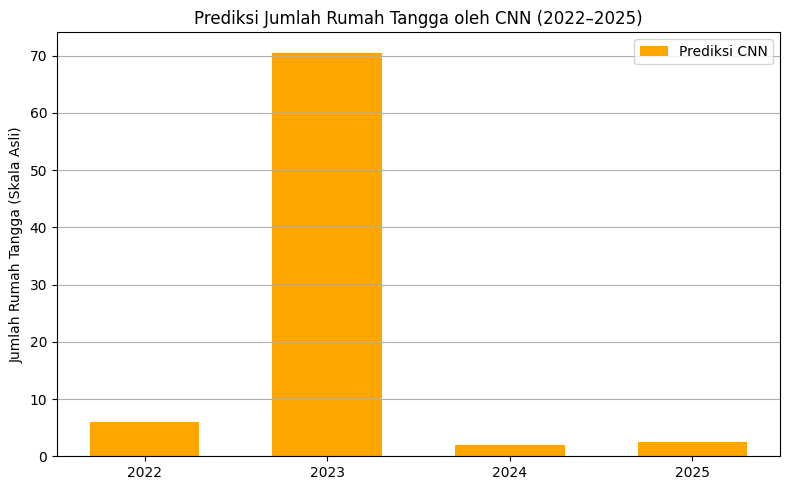

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Ambil hasil prediksi CNN yang sudah di-inverse
# Asumsikan pred_cnn_unscaled adalah (n_samples, 1), kita ambil 4 terakhir
pred_cnn_unscaled = pred_cnn_unscaled.flatten()[-4:]

# Buat label tahun
labels = ['2022', '2023', '2024', '2025']
x_indexes = np.arange(len(labels))

# Plot batang
plt.figure(figsize=(8, 5))
plt.bar(x_indexes, pred_cnn_unscaled, width=0.6, color='orange', label='Prediksi CNN')
plt.xticks(x_indexes, labels)
plt.ylabel('Jumlah Rumah Tangga (Skala Asli)')
plt.title('Prediksi Jumlah Rumah Tangga oleh CNN (2022–2025)')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
mae_cnn, rmse_cnn, y_true_cnn, y_pred_cnn = evaluate_model(model_cnn, X_test, y_test, scaler, "CNN")
mae_lstm, rmse_lstm, y_true_lstm, y_pred_lstm = evaluate_model(model_lstm, X_test, y_test, scaler, "LSTM")
mae_cnn_lstm, rmse_cnn_lstm, y_true_cnn_lstm, y_pred_cnn_lstm = evaluate_model(model_cnn_lstm, X_test, y_test, scaler, "CNN-LSTM")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step
📊 Evaluasi CNN
MAE  : 10.0498
RMSE : 18.3139
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
📊 Evaluasi LSTM
MAE  : 10.1863
RMSE : 18.4598
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
📊 Evaluasi CNN-LSTM
MAE  : 13.3807
RMSE : 24.7978


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(model, X_test, y_test, scaler, model_name="Model"):
    # Prediksi dari model
    y_pred_scaled = model.predict(X_test)

    # Invers transformasi ke skala asli
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_true = scaler.inverse_transform(y_test)

    # Hitung metrik evaluasi
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    print(f"📊 Evaluasi {model_name}")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    return mae, rmse, y_true, y_pred
